In [182]:
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [183]:
x = np.arange(1, 20.1, 0.1)

In [184]:
x

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

In [185]:
y = []

In [186]:
for i in x:
    y.append(3*i + 2 + np.random.randn())

In [187]:
y = np.array(y)

In [188]:
X = np.c_[np.ones(len(x)), x] 
y = y.reshape(-1,1)

In [189]:
X.shape

(191, 2)

In [190]:
def first_derivative():
    return 2 * (X.T @ (X @ w_t - y))

In [191]:
def second_derivative():
    return 2*(X.T @ X)

In [192]:
w_t = np.random.randn(2).reshape(-1,1)

In [193]:
w_t_plus_one = w_t - np.linalg.inv(second_derivative()) @ (first_derivative())

In [194]:
w_t_plus_one

array([[1.59506233],
       [3.03076273]])

## Q2

In [195]:
A = np.array([5, 0, 0, 0.5]).reshape(2, 2)

In [196]:
X = np.array([6, 6]).reshape(2, 1)

In [197]:
num_iters = 10

In [198]:
newton_points = []

In [199]:
for i in range(num_iters):
    X = X - np.linalg.inv(A) @ (A @ X)
    newton_points.append(X)
    print(X)

[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]


In [200]:
newton_points = np.array(newton_points).reshape(10, 2)

In [201]:
gradient_points = []

In [202]:
alpha = 0.1
X = np.array([6, 6]).reshape(2, 1)

In [203]:
for i in range(num_iters):
    gradient = (A @ X)
    X = X - alpha*gradient
    gradient_points.append(X)
    print(X)

[[3. ]
 [5.7]]
[[1.5  ]
 [5.415]]
[[0.75   ]
 [5.14425]]
[[0.375    ]
 [4.8870375]]
[[0.1875    ]
 [4.64268563]]
[[0.09375   ]
 [4.41055134]]
[[0.046875  ]
 [4.19002378]]
[[0.0234375 ]
 [3.98052259]]
[[0.01171875]
 [3.78149646]]
[[0.00585938]
 [3.59242164]]


In [204]:
gradient_points = np.array(gradient_points).reshape(num_iters,2)

## Contour plots

In [205]:
xx = np.linspace(-7, 7, 200)
yy = np.linspace(-7, 7, 200)
XX, YY = np.meshgrid(xx, yy)

In [206]:
XX, YY = np.meshgrid(xx, yy)

In [207]:
rows, cols = XX.shape

In [208]:
ZZ = np.zeros((rows, cols))

In [209]:
for i in range(rows):
    for j in range(cols):
        x_val = XX[i, j]
        y_val = YY[i, j]

        
        x_vec = np.array([[x_val], [y_val]])
        ZZ[i, j] = 0.5 * (x_vec.T @ A @ x_vec).item()

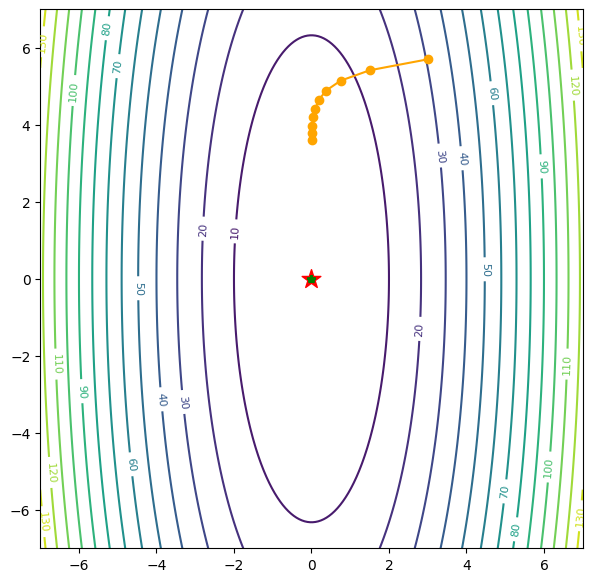

In [210]:
plt.figure(figsize=(7, 7))

contours = plt.contour(XX, YY, ZZ, levels=15)
plt.clabel(contours, inline=True, fontsize=8)

plt.plot(gradient_points[:, 0], gradient_points[:, 1],marker='o', color='orange', label="Gradient Descent")
plt.plot(newton_points[:, 0], newton_points[:, 1], marker='*', color='green', label="Newton’s Method")

#Optimum at (0, 0)
plt.scatter(0, 0, marker='*', s=200, color='red', label="Optimum")